In [42]:
import matplotlib.pyplot as plt
from algorithms import greedy_algorithm, greddy_alternative, dynamic_programming
from aux import create_bribes, create_products, measure_time
from functools import reduce


In [60]:
def stress_test(initial_qty, initial_packs, initial_types, max_iterations, multiplier, func):
    qty = initial_qty
    packages = initial_packs
    prod_types = initial_types

    iteration = 0
    
    t_qty = []
    t_pack = []
    t_types = []
    n_qty = []
    n_pack = []
    n_type = []
    opt_pack = []
    opt_qty = []
    to_bribe_qty = []
    to_bribe_pack = []
    while iteration < max_iterations:
        # fixed product type to 1 and package quantity
        n_qty.append(qty)
        products = create_products(initial_types, qty, initial_packs)
        asked_bribe = create_bribes(products)
        bribes, res_time = measure_time(func, products, asked_bribe)
        t_qty.append(res_time)
        to_bribe_qty.append(asked_bribe[0].qty)
        opt_qty.append(reduce(lambda acum, prod: acum + prod.qty, bribes[1], 0))
        
        qty *= multiplier
        
        # fixed product type to 1 and qty per package
        n_pack.append(packages)
        products = create_products(initial_types, initial_qty, packages)
        asked_bribe = create_bribes(products)
        bribes, res_time = measure_time(func, products, asked_bribe)
        t_pack.append(res_time)
        to_bribe_pack.append(asked_bribe[0].qty)
        opt_pack.append(reduce(lambda acum, prod: acum + prod.qty, bribes[1], 0))
        
        
        packages *= multiplier
        
        iteration += 1
        
        
    plt.figure(figsize=(10,6))
    plt.plot(n_qty, t_qty, label='Variacion-qty-packages')
    plt.title(f"Tiempo en funcion variacion qty unidades por paquete de {func.__name__}")
    plt.xlabel("Unidades por paquete")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.plot(n_pack, t_pack, label='Variacion-qty-packages')
    plt.title(f"Tiempo en funcion variacion cantidad de paquetes de {func.__name__}")
    plt.xlabel("Paquetes totales")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    
    return to_bribe_pack,opt_pack, to_bribe_qty, opt_qty

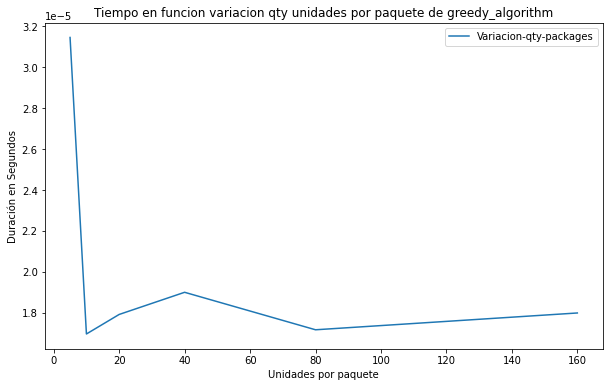

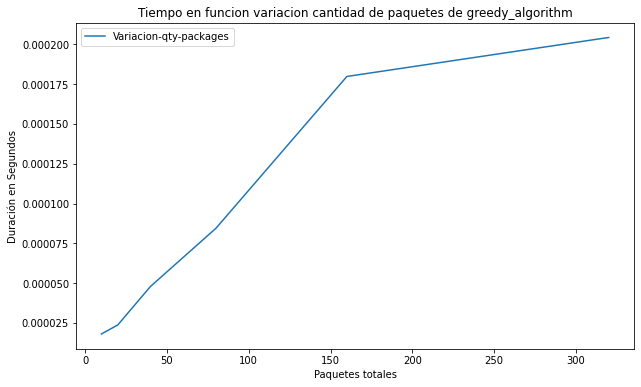

[12, 22, 92, 127, 113, 4]
[15, 22, 92, 127, 115, 5]
[27, 32, 79, 205, 122, 93]
[29, 35, 80, 208, 151, 137]


In [63]:
bribe_pack, pack, bribe_qty, qty = stress_test(5, 10, 1, 6, 2, greedy_algorithm)
print(bribe_pack)
print(pack)
print(bribe_qty)
print(qty)

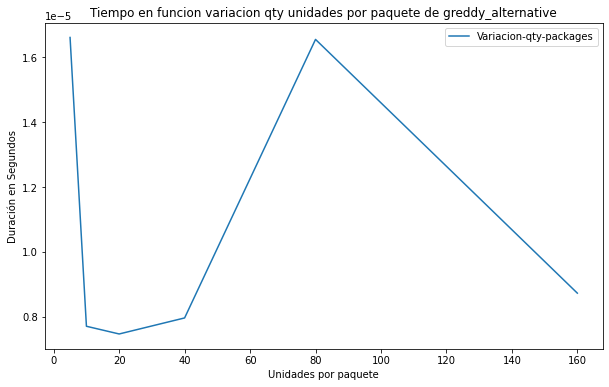

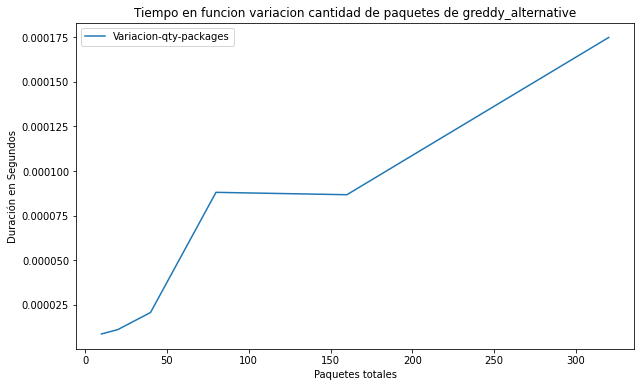

([30, 5, 51, 1, 325, 416],
 [30, 5, 51, 1, 325, 416],
 [4, 58, 78, 125, 146, 326],
 [4, 58, 78, 127, 149, 328])

In [64]:
stress_test(5, 10, 1, 6, 2, greddy_alternative)

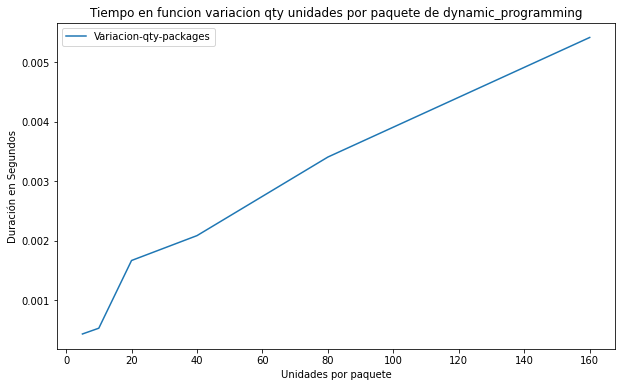

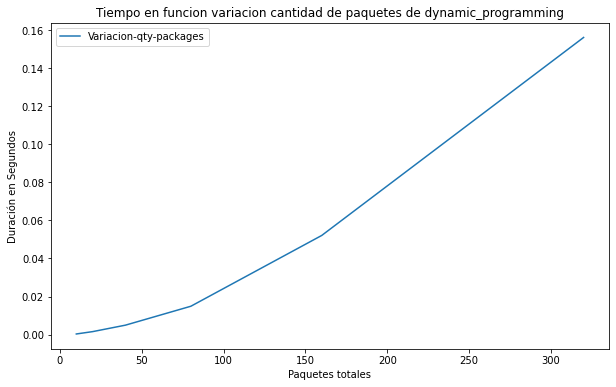

([9, 8, 54, 209, 142, 759],
 [9, 8, 54, 209, 142, 759],
 [18, 29, 66, 140, 185, 831],
 [18, 29, 66, 140, 185, 831])

In [65]:
stress_test(5, 10, 1, 6, 2, dynamic_programming)

In [85]:
def stress_test(initial_qty, initial_packs, initial_types, max_iterations, multiplier):
    qty = initial_qty
    packages = initial_packs
    prod_types = initial_types

    iteration = 0
    
    t_qty = []
    t_pack = []
    t_types = []
    n_qty = []
    n_pack = []
    n_type = []
    opt_pack = []
    opt_qty = []
    to_bribe_qty = []
    to_bribe_pack = []
    
    while iteration < max_iterations:
        # fixed product type to 1 and package quantity
        n_qty.append(qty)
        products = create_products(initial_types, qty, initial_packs)
        asked_bribe = create_bribes(products)
        brb_greed, time_greed = measure_time(greedy_algorithm, products, asked_bribe)
        brb_greed_alt, time_greed_alt = measure_time(greddy_alternative, products, asked_bribe)
        brb_dynam, time_dynam = measure_time(dynamic_programming, products, asked_bribe)
        
        t_qty.append((time_greed, time_greed_alt, time_dynam))
        to_bribe_qty.append(asked_bribe[0].qty)
        tot_greed = reduce(lambda acum, prod: acum + prod.qty, brb_greed[1], 0)
        tot_greed_alt = reduce(lambda acum, prod: acum + prod.qty, brb_greed_alt[1], 0)
        tot_dynam = reduce(lambda acum, prod: acum + prod.qty, brb_dynam[1], 0)
        opt_qty.append((tot_greed, tot_greed_alt, tot_dynam))
        
        qty *= multiplier
        
        # fixed product type to 1 and qty per package
        n_pack.append(packages)
        products = create_products(initial_types, initial_qty, packages)
        asked_bribe = create_bribes(products)
        brb_greed, time_greed = measure_time(greedy_algorithm, products, asked_bribe)
        brb_greed_alt, time_greed_alt = measure_time(greddy_alternative, products, asked_bribe)
        brb_dynam, time_dynam = measure_time(dynamic_programming, products, asked_bribe)
        
        t_pack.append((time_greed, time_greed_alt, time_dynam))
        to_bribe_pack.append(asked_bribe[0].qty)
        tot_greed = reduce(lambda acum, prod: acum + prod.qty, brb_greed[1], 0)
        tot_greed_alt = reduce(lambda acum, prod: acum + prod.qty, brb_greed_alt[1], 0)
        tot_dynam = reduce(lambda acum, prod: acum + prod.qty, brb_dynam[1], 0)
        opt_pack.append((tot_greed, tot_greed_alt, tot_dynam))
        
        
        packages *= multiplier
        
        iteration += 1
        
    plt.figure(figsize=(10,8))
    plt.plot(n_qty, t_qty, label=['greedy', 'greedy_alt', 'dynamic'])
    plt.title(f"Tiempo en funcion variacion qty unidades por paquete")
    plt.xlabel("Unidades por paquete")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,8))
    plt.plot(n_pack, t_pack, label=['greedy', 'greedy_alt', 'dynamic'])
    plt.title(f"Tiempo en funcion variacion cantidad de paquetes")
    plt.xlabel("Paquetes totales")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    return to_bribe_pack,opt_pack, to_bribe_qty, opt_qty        

    


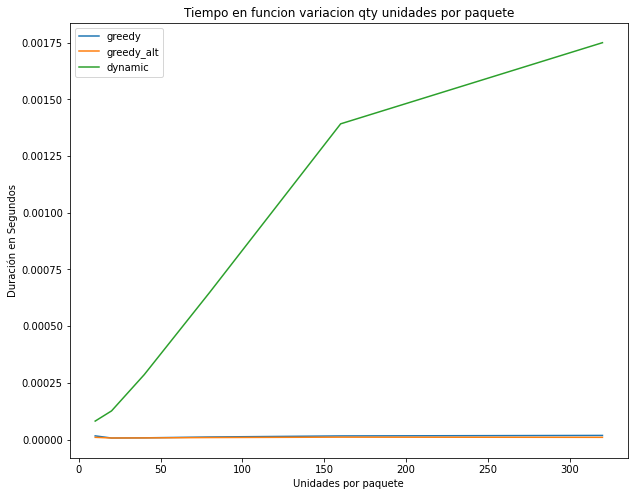

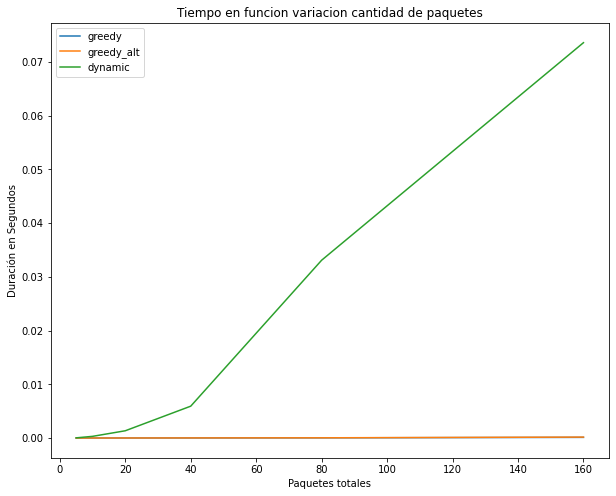

([5, 41, 50, 83, 32, 569],
 [(5, 5, 5),
  (44, 41, 41),
  (51, 50, 50),
  (88, 83, 83),
  (40, 32, 32),
  (570, 569, 569)],
 [21, 10, 49, 61, 434, 532],
 [(22, 22, 22),
  (14, 10, 10),
  (58, 49, 49),
  (64, 76, 64),
  (461, 461, 461),
  (573, 535, 535)])

In [93]:
stress_test(10, 5, 1, 6, 2)

In [91]:
def stress_test2(initial_qty, initial_packs, initial_types, max_iterations, multiplier):
    qty = initial_qty
    packages = initial_packs
    prod_types = initial_types

    iteration = 0
    
    t_qty = []
    t_pack = []
    t_types = []
    n_qty = []
    n_pack = []
    n_type = []
    opt_pack = []
    opt_qty = []
    to_bribe_qty = []
    to_bribe_pack = []
    
    while iteration < max_iterations:
        # fixed product type to 1 and package quantity
        n_qty.append(qty)
        print(f"qty:  {qty}")
        products = create_products(initial_types, qty, initial_packs)
        asked_bribe = create_bribes(products)
        brb_greed, time_greed = measure_time(greedy_algorithm, products, asked_bribe)
        brb_greed_alt, time_greed_alt = measure_time(greddy_alternative, products, asked_bribe)
        brb_dynam, time_dynam = measure_time(dynamic_programming, products, asked_bribe)
        
        t_qty.append((time_greed, time_greed_alt, time_dynam))
        to_bribe_qty.append(asked_bribe[0].qty)
        tot_greed = reduce(lambda acum, prod: acum + prod.qty, brb_greed[1], 0)
        tot_greed_alt = reduce(lambda acum, prod: acum + prod.qty, brb_greed_alt[1], 0)
        tot_dynam = reduce(lambda acum, prod: acum + prod.qty, brb_dynam[1], 0)
        opt_qty.append((tot_greed, tot_greed_alt, tot_dynam))
        
        qty *= multiplier
        
        # fixed product type to 1 and qty per package
        n_pack.append(packages)
        print(f"packagees {packages}")
        products = create_products(initial_types, initial_qty, packages)
        asked_bribe = create_bribes(products)
        brb_greed, time_greed = measure_time(greedy_algorithm, products, asked_bribe)
        brb_greed_alt, time_greed_alt = measure_time(greddy_alternative, products, asked_bribe)
        brb_dynam, time_dynam = measure_time(dynamic_programming, products, asked_bribe)
        
        t_pack.append((time_greed, time_greed_alt, time_dynam))
        to_bribe_pack.append(asked_bribe[0].qty)
        tot_greed = reduce(lambda acum, prod: acum + prod.qty, brb_greed[1], 0)
        tot_greed_alt = reduce(lambda acum, prod: acum + prod.qty, brb_greed_alt[1], 0)
        tot_dynam = reduce(lambda acum, prod: acum + prod.qty, brb_dynam[1], 0)
        opt_pack.append((tot_greed, tot_greed_alt, tot_dynam))
        
        
        packages *= multiplier
        
        iteration += 1
        
    plt.figure(figsize=(10,8))
    plt.plot(n_qty, t_qty, label=['greedy', 'greedy_alt', 'dynamic'])
    plt.title(f"Tiempo en funcion variacion qty unidades por paquete")
    plt.xlabel("Unidades por paquete")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,8))
    plt.plot(n_pack, t_pack, label=['greedy', 'greedy_alt', 'dynamic'])
    plt.title(f"Tiempo en funcion variacion cantidad de paquetes")
    plt.xlabel("Paquetes totales")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    return to_bribe_pack,opt_pack, to_bribe_qty, opt_qty        

    


qty:  10
packagees 5
qty:  20
packagees 10
qty:  40
packagees 20
qty:  80
packagees 40
qty:  160
packagees 80
qty:  320
packagees 160


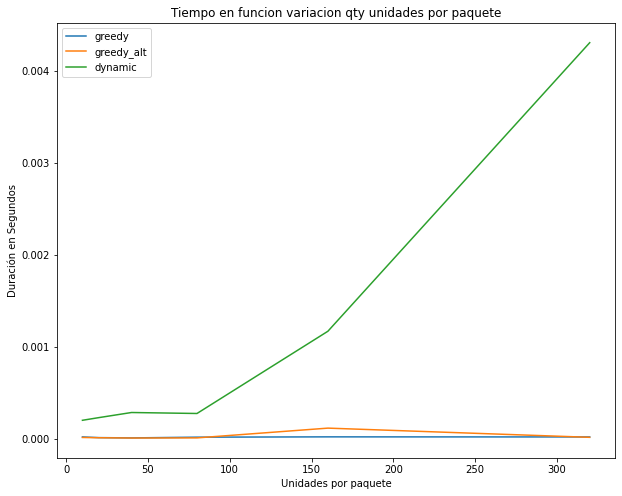

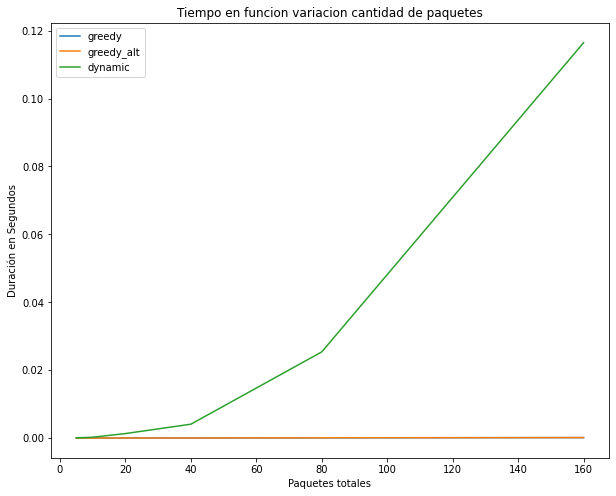

([2, 44, 111, 212, 215, 169],
 [(7, 2, 2),
  (45, 44, 44),
  (113, 111, 111),
  (214, 212, 212),
  (219, 215, 215),
  (176, 169, 169)],
 [3, 33, 96, 9, 111, 756],
 [(10, 7, 7),
  (38, 37, 33),
  (112, 97, 97),
  (50, 19, 19),
  (150, 123, 122),
  (795, 795, 795)])

In [92]:
stress_test2(10, 5, 1, 6, 2)

In [141]:
from clases import Product
from clases import Bribe
import pandas as pd

def prepare_scenarios(source_file):
    df = pd.read_csv(source_file, sep=',')

    scenarios = {}
    for scenario in df.scenario.unique():
        scenarios[scenario] = {}
        cases = df[df.scenario == scenario]
        scenario_packages = []
        scenario_bribes = []
        for _, test_case in cases.iterrows():
            prod_type = test_case.type
            scenario_packages += [Product(prod_type, int(qty)) for qty in test_case.packages.split(";")]
            scenario_bribes += [Bribe(prod_type, int(test_case.bribe))]
        scenarios[scenario] = {'packages':scenario_packages, 'bribe': scenario_bribes}
    return scenarios

In [163]:
a = prepare_scenarios('test_cases.csv')

for scenario, cases in a.items():
    products = cases['packages']
    asked_bribe = cases['bribe']
    
    print(f"----------------------\nSCENARIO: {scenario}")
    print("Available Products:\n")
    [print(prod) for prod in sorted(products, key=lambda x: x.prod_type)]
    print("\nBribes:\n")
    [print(bribe) for bribe in asked_bribe]
    
    print("\nGREEDY")
    bribes, res_time = measure_time(greedy_algorithm, products, asked_bribe)
    print(f"\nDelerivered as bribe, in {res_time}")
    for prod_type,bribes in bribes.items():
        total = reduce(lambda acum, prod: acum + prod.qty, bribes, 0)
        a = ",".join(list(map(lambda x: str(x.qty), bribes)))
        print(f"product type: {prod_type} delivered: {total} packages in {len(bribes)} units {a}")


    print("\nGREEDY ALT")
    bribes, res_time = measure_time(greddy_alternative, products, asked_bribe)
    print(f"\nDelerivered as bribe, in {res_time}")
    for prod_type,bribes in bribes.items():
        total = reduce(lambda acum, prod: acum + prod.qty, bribes, 0)
        a = ",".join(list(map(lambda x: str(x.qty), bribes)))
        print(f"product type: {prod_type} delivered: {total} packages in {len(bribes)} units {a}")
        

    print("\nDYNAMIC")
    bribes, res_time = measure_time(dynamic_programming, products, asked_bribe)
    print(f"\nDelerivered as bribe, in {res_time}")
    for prod_type,bribes in bribes.items():
        total = reduce(lambda acum, prod: acum + prod.qty, bribes, 0)
        a = ",".join(list(map(lambda x: str(x.qty), bribes)))
        print(f"product type: {prod_type} delivered: {total} packages in {len(bribes)} units {a}")


----------------------
SCENARIO: 3
Available Products:

Product type: 0-qty: 10
Product type: 0-qty: 8
Product type: 0-qty: 5
Product type: 0-qty: 2

Bribes:

Product Type: 0-qty: 12

GREEDY

Delerivered as bribe, in 1.5763000000390548e-05
product type: 0 delivered: 18 packages in 2 units 10,8

GREEDY ALT

Delerivered as bribe, in 1.814099999997154e-05
product type: 0 delivered: 13 packages in 2 units 8,5

DYNAMIC

Delerivered as bribe, in 8.50159999998823e-05
product type: 0 delivered: 12 packages in 2 units 2,10
----------------------
SCENARIO: 4
Available Products:

Product type: 0-qty: 10
Product type: 0-qty: 10
Product type: 0-qty: 2
Product type: 0-qty: 2
Product type: 0-qty: 1
Product type: 0-qty: 1

Bribes:

Product Type: 0-qty: 4

GREEDY

Delerivered as bribe, in 1.4915000000392808e-05
product type: 0 delivered: 10 packages in 1 units 10

GREEDY ALT

Delerivered as bribe, in 1.2848999999981459e-05
product type: 0 delivered: 4 packages in 3 units 2,1,1

DYNAMIC

Delerivered as 